In [21]:
import pandas as pd 

df = pd.DataFrame({
    "Pregnancies":[6,1,8,1,0,5,3,10,2,8],
    "Glucose":[148,85,183,89,137,116,78,115,197,125],
    "BloodPressure":[72,66,64,66,40,74,50,0,70,96],
    "SkinThickness":[35,29,0,23,35,0,32,0,45,0],
    "Insulin":[0,0,0,94,168,0,88,0,543,0],
    "BMI":[33.6,26.6,23.3,28.1,43.1,25.6,31.0,35.3,30.5,0],
    "DiabetesPedigreeFunction":[0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232],
    "Age":[50,31,32,21,33,30,26,29,53,54],
    "Outcome":[1,0,1,0,1,0,1,0,1,1]
})

X = df.drop(columns='Outcome', axis=1) 
Y = df['Outcome'] 
X 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [22]:
Y 

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42) 
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("Y_train shape:", Y_train.shape) 
print("Y_test shape:", Y_test.shape) 

X_train shape: (8, 8)
X_test shape: (2, 8)
Y_train shape: (8,)
Y_test shape: (2,)


In [25]:
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, Y_train) 


LogisticRegression(max_iter=1000)

In [26]:
from sklearn.metrics import accuracy_score 
X_train_prediction = model.predict(X_train) 
training_data_accuracy = accuracy_score(Y_train, X_train_prediction) 
print("Accuracy on Training data :", round(training_data_accuracy * 100, 2), "%") 

Accuracy on Training data : 100.0 %


In [27]:
X_test_prediction = model.predict(X_test) 
test_data_accuracy = accuracy_score(Y_test, X_test_prediction) 
print("Accuracy on Test data :", round(test_data_accuracy * 100, 2), "%") 

Accuracy on Test data : 100.0 %


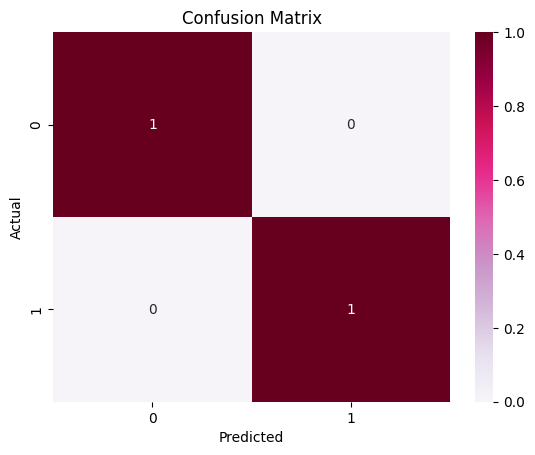

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

In [29]:
from sklearn.metrics import precision_score 
precision_train = precision_score(Y_train, X_train_prediction) 
print("Training data Precision =", precision_train) 

Training data Precision = 1.0


In [30]:
precision_test = precision_score(Y_test, X_test_prediction) 
print("Test data Precision =", precision_test) 

Test data Precision = 1.0


In [31]:
from sklearn.metrics import recall_score 
recall_train = recall_score(Y_train, X_train_prediction) 
print("Training data Recall =", recall_train) 

Training data Recall = 1.0


In [32]:
recall_test = recall_score(Y_test, X_test_prediction) 
print("Test data Recall =", recall_test) 


Test data Recall = 1.0


In [33]:
from sklearn.metrics import f1_score 
f1_score_train = f1_score(Y_train, X_train_prediction) 
print("Training data F1 Score =", f1_score_train) 

Training data F1 Score = 1.0


In [34]:
f1_score_test = f1_score(Y_test, X_test_prediction) 
print("Test data F1 Score =", f1_score_test) 

Test data F1 Score = 1.0


In [35]:
def precision_recall_f1_score(true_labels, pred_labels): 
    precision_value = precision_score(true_labels, pred_labels) 
    recall_value = recall_score(true_labels, pred_labels) 
    f1_score_value = f1_score(true_labels, pred_labels) 
    print('Precision =', precision_value) 
    print('Recall =', recall_value) 
    print('F1 Score =', f1_score_value) 

In [36]:
precision_recall_f1_score(Y_train, X_train_prediction) 
precision_recall_f1_score(Y_test, X_test_prediction) 


Precision = 1.0
Recall = 1.0
F1 Score = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
